#### **1) Application of Contours**

**a) Motion Detection:**

- In surveillance video, motion detection technology has numerous applications, ranging from indoor and outdoor security environments, traffic control, behaviour detection during sports activities, detection of unattended objects, and even compression of video. In the figure below, see how detecting the movement of people in a video stream could be useful in a surveillance application. Notice how the group of people standing still in the left side of the image are not detected. Only those in motion are captured. Do refer to this paper to study this approach in detail.

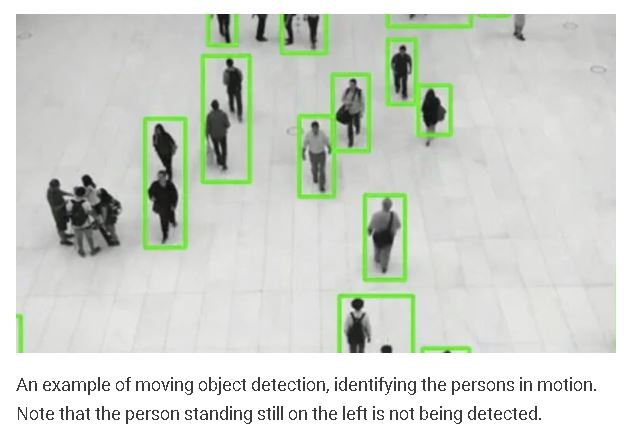

**b) Unattended object detection:**

- Any unattended object in public places is generally considered as a suspicious object. An effective and safe solution could be: (Unattended Object Detection through Contour Formation using Background Subtraction).

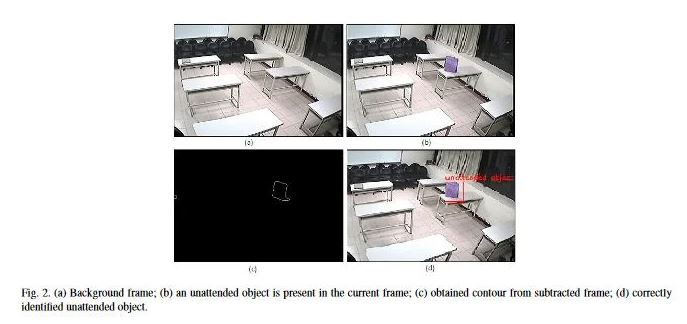

**c) Background / Foreground Segmentation:**

- To replace the background of an image with another, you need to perform image-foreground extraction (similar to image segmentation). Using contours is one approach that can be used to perform segmentation. Refer to this post for more details. The following images show simple examples of such an application:

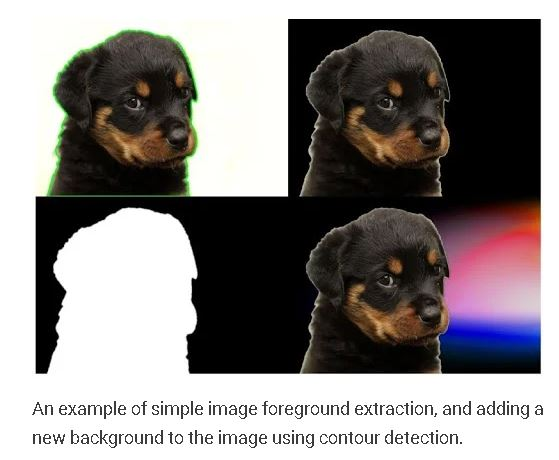

#### **What are Contours**

- When we join all the points on the boundary of an object, we get a contour. Typically, a specific contour refers to boundary pixels that have the same color and intensity. OpenCV makes it really easy to find and draw contours in images. It provides two simple functions:

 - findContours()

 - drawContours()

- Also, it has two different algorithms for contour detection:

 - CHAIN_APPROX_SIMPLE

 - CHAIN_APPROX_NONE

#### **Steps for Detecting and Drawing Contours**

 - Read the Image and convert it to Grayscale Format

 - Apply Binary Thresholding

 - Find the Contours

         findContours()

 - Draw Contours on the Original RGB Image.

        drawContours()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

import cv2

path = '/content/drive/MyDrive/OpenCV-Images/phone.JPG'

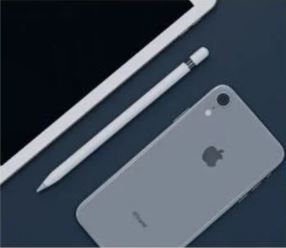

In [ ]:
from google.colab.patches import cv2_imshow

img = cv2.imread(path, cv2.IMREAD_COLOR)
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# convert the image to grayscale format
# use the cvtColor() function to convert the original RGB image to a grayscale image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

- Now, use the **threshold()** function to apply a binary threshold to the image. Any pixel with a value greater than 150 will be set to a value of 255 (white). All remaining pixels in the resulting image will be set to 0 (black). The threshold value of 150 is a tunable parameter, so you can experiment with it. 

- After thresholding, visualize the binary image, using the **imshow()** function as shown below. 

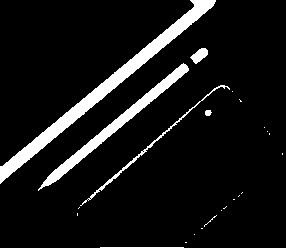

In [ ]:
# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# visualize the binary image
cv2_imshow(thresh)

cv2.waitKey(0)

cv2.imwrite('image_thres1.jpg', thresh)

cv2.destroyAllWindows()

#### **1) Drawing Contours using CHAIN_APPROX_NONE**

- Now, let’s find and draw the contours, using the CHAIN_APPROX_NONE method. 

- Start with the **findContours()** function. It has three required arguments, as shown below. For optional arguments, please refer to the documentation page here.

 - **image:** The binary input image obtained in the previous step.

 - **mode:** This is the contour-retrieval mode. We provided this as **RETR_TREE**, which means the algorithm will retrieve all possible contours from the binary image. More contour retrieval modes are available, we will be discussing them too. You can learn more details on these options here. 

 - **method:** This defines the contour-approximation method. In this example, we will use **CHAIN_APPROX_NONE**.Though slightly slower than **CHAIN_APPROX_SIMPLE**, we will use this method here tol store ALL contour points. 

- Next, use the **drawContours()** function to overlay the contours on the RGB image. This function has four required and several optional arguments. The first four arguments below are required. For the optional arguments, please refer to the documentation page here.

 - **image:** This is the input RGB image on which you want to draw the contour.

 - **contours:** Indicates the **contours** obtained from the **findContours()** function.

 - **contourIdx:** The pixel coordinates of the contour points are listed in the obtained contours. Using this argument, you can specify the index position from this list, indicating exactly which contour point you want to draw. Providing a negative value will draw all the contour points.

 - **color:** This indicates the color of the contour points you want to draw. We are drawing the points in green.
thickness: This is the thickness of contour points.

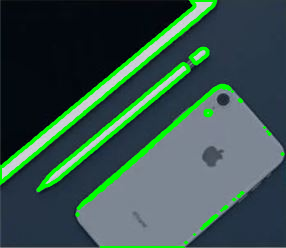

In [ ]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2_imshow(image_copy)

cv2.waitKey(0)

cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

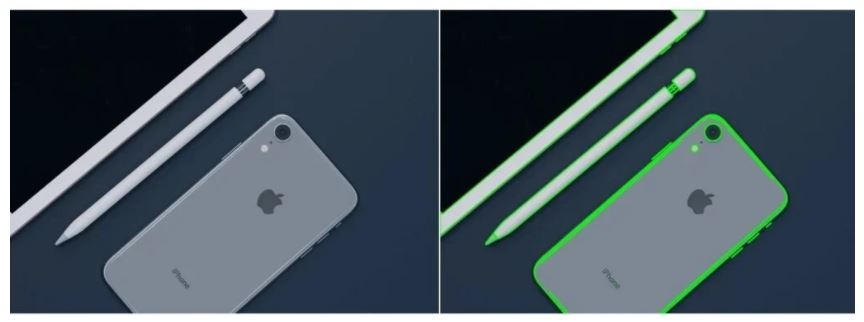

#### **Using Single Channel: Red, Green, or Blue**

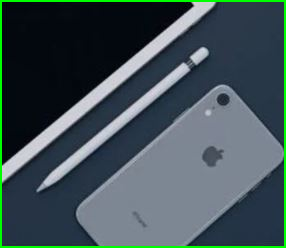

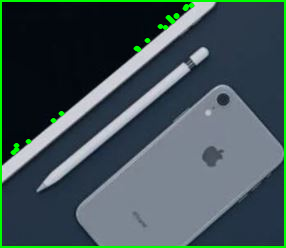

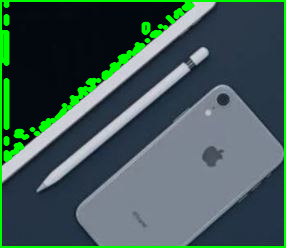

In [ ]:
# B, G, R channel splitting
blue, green, red = cv2.split(img)

# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_blue = img.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2_imshow(image_contour_blue) # Contour detection using blue channels only
cv2.waitKey(0)
cv2.imwrite('blue_channel.jpg', image_contour_blue)
cv2.destroyAllWindows()

# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_green = img.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2_imshow(image_contour_green) # Contour detection using green channels only
cv2.waitKey(0)
cv2.imwrite('green_channel.jpg', image_contour_green)
cv2.destroyAllWindows()

# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_contour_red = img.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
cv2_imshow(image_contour_red) # Contour detection using red channels only
cv2.waitKey(0)

cv2.imwrite('red_channel.jpg', image_contour_red)
cv2.destroyAllWindows()

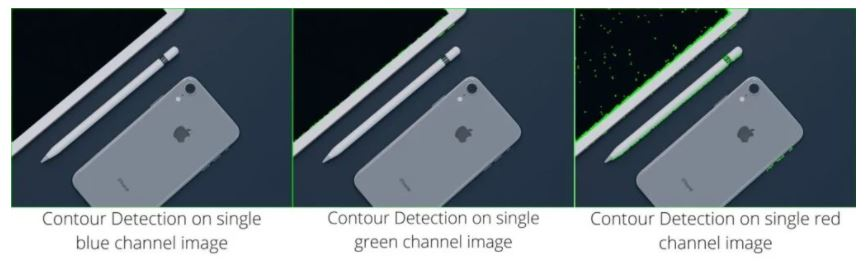

#### **2) Drawing Contours using CHAIN_APPROX_SIMPLE**

- Let’s find out now how the **CHAIN_APPROX_SIMPLE** algorithm works and what makes it different from the **CHAIN_APPROX_NONE** algorithm.

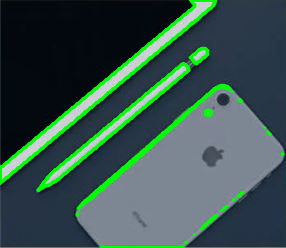

In [ ]:
"""
2
Now let's try with `cv2.CHAIN_APPROX_SIMPLE`
3
"""
# detect the contours on the binary image using cv2.ChAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = img.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)

# see the results
cv2_imshow(image_copy1) # Simple approximation

cv2.waitKey(0)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)
cv2.destroyAllWindows()

- The only difference here is that we specify the method for findContours() as **CHAIN_APPROX_SIMPLE** instead of **CHAIN_APPROX_NONE**.

- The **CHAIN_APPROX_SIMPLE**  algorithm compresses horizontal, vertical, and diagonal segments along the contour and leaves only their end points. This means that any of the points along the straight paths will be dismissed, and we will be left with only the end points. For example, consider a contour, along a rectangle. All the contour points, except the four corner points will be dismissed. This method is faster than the **CHAIN_APPROX_NONE** because the algorithm does not store all the points, uses less memory, and therefore, takes less time to execute.

-----------------------------

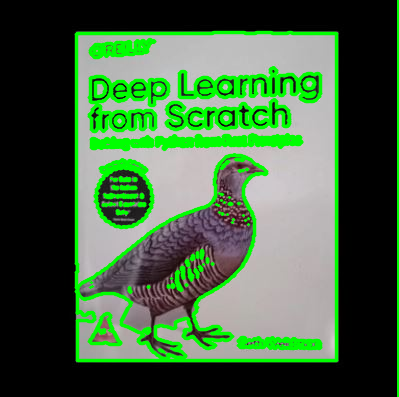

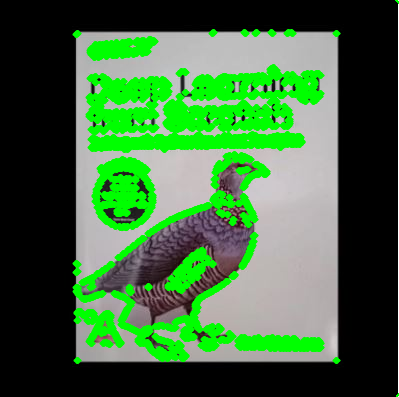

In [ ]:
# to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image

path1 = '/content/drive/MyDrive/OpenCV-Images/Deep Learning.JPG'

image1 = cv2.imread(path1)

img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2_imshow(image_copy2) # SIMPLE Approximation contours
cv2.waitKey(0)
image_copy3 = image1.copy()

for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)

# see the results
cv2_imshow(image_copy3) # CHAIN_APPROX_SIMPLE Point only

cv2.waitKey(0)
cv2.imwrite('contour_point_simple.jpg', image_copy3)
cv2.destroyAllWindows()

#### **Reference**
- https://learnopencv.com/contour-detection-using-opencv-python-c/